In [2]:
import json
import pandas as pd

file_path = 'd0bec625-ba7d-4a57-8cf8-8a68c57491cc.json'

with open(file_path, 'r') as file:
    data = json.load(file)


# Now you can work with the un-JSONed data
# For example, you can access specific values using keys
print(data)


{'metadata': {'consent': 'on', 'participant_number': '67', 'gender': 'prefer not to say', 'age': '26-30', 'education': 'Applied university (HBO in Dutch)/ University bachelor', 'experience': 'Somewhat', 'version_sequence': ['version4', 'version1', 'version2', 'version3'], 'dataset_sequence': ['dataset4', 'dataset1', 'dataset2', 'dataset3'], 'run_id': 4, 'uuid': 'd0bec625-ba7d-4a57-8cf8-8a68c57491cc'}, 'log_version1': [[{'sequenceID': 1, 'source': 'trueAnomaly', 'event': 'anomaly', 'block': {'id': 63, 'xpos': 60, 'colorID': 2, 'eventCat': '10', 'inititialTime': '2024-04-23T09:51:35.179Z', 'detectionTime': '2024-04-23T09:51:35.179Z'}}], [{'sequenceID': 11, 'source': 'trueAnomaly', 'event': 'anomaly', 'block': {'id': 63, 'xpos': 60, 'colorID': 2, 'eventCat': '10', 'inititialTime': '2024-04-23T09:51:35.205Z', 'detectionTime': '2024-04-23T09:51:35.205Z'}}], [{'sequenceID': 8, 'source': 'trueAnomaly', 'event': 'anomaly', 'block': {'id': 66, 'xpos': 60, 'colorID': 2, 'eventCat': '10', 'initit

In [3]:
# # Extract log_version3 data
# log_version_data = data['log_version3']

# # Flatten the nested lists
# flattened_data = [item for sublist in log_version_data for item in sublist]

# # Convert to DataFrame
# df = pd.json_normalize(flattened_data)
# df.rename(columns={'block.id': 'ic'}, inplace=True)
# df.rename(columns={'block.xpos': 'xpos'}, inplace=True)
# df.rename(columns={'block.colorID': 'colorID'}, inplace=True)
# df.rename(columns={'block.eventCat': 'eventCat'}, inplace=True)
# df.rename(columns={'block.inititialTime': 'inititialTime'}, inplace=True)
# df.rename(columns={'block.detectionTime': 'detectionTime'}, inplace=True)
# df

In [4]:
# anonamlies = df[df['event'] == 'anomaly']
# sorted_anomalies = anonamlies.sort_values(by=['sequenceID', 'id'])
# sorted_anomalies


In [5]:
# accuracy_table = sorted_anomalies.copy()
# accuracy_table = accuracy_table[['sequenceID', 'id']]
# accuracy_table.reset_index(drop=True, inplace=True)
# accuracy_table


In [6]:
# detector = df[df['source'] == 'detector']
# sorted_detector= detector.sort_values('sequenceID')
# sorted_detector


In [7]:
# user_detected_anomalies = df[(df['source'] == 'user') & ((df['event'] == 'confirmAnomaly') | (df['event'] == 'markAsAnomaly'))]
# sorted_user_detected_anomalies= user_detected_anomalies.sort_values('sequenceID')
# user_detected_anomalies = sorted_user_detected_anomalies[['sequenceID', 'id']]
# user_detected_anomalies.reset_index(drop=True, inplace=True)
# user_detected_anomalies


In [8]:
# accuracy_table['is_detected'] = accuracy_table.apply(lambda row: (row['sequenceID'], row['id']) in zip(user_detected_anomalies['sequenceID'], user_detected_anomalies['id']), axis=1)
# accuracy_table


In [9]:
# true_values = accuracy_table[accuracy_table['is_detected'] == True]
# accuracy = len(true_values) / len(accuracy_table)
# accuracy

In [10]:
# count_true = accuracy_table['is_detected'].value_counts(normalize=True)
# print(count_true)


In [11]:
def calculate_accuracy(log_version, data):

  log_version_data = data[log_version]

  # Flatten the nested lists
  flattened_data = [item for sublist in log_version_data for item in sublist]

  df = pd.json_normalize(flattened_data)
  df.rename(columns={'block.id': 'id'}, inplace=True)
  df.rename(columns={'block.xpos': 'xpos'}, inplace=True)
  df.rename(columns={'block.colorID': 'colorID'}, inplace=True)
  df.rename(columns={'block.eventCat': 'eventCat'}, inplace=True)
  df.rename(columns={'block.inititialTime': 'inititialTime'}, inplace=True)
  df.rename(columns={'block.detectionTime': 'detectionTime'}, inplace=True)

  anonamlies = df[df['event'] == 'anomaly']
  sorted_anomalies = anonamlies.sort_values(by=['sequenceID', 'id'])

  accuracy_table = sorted_anomalies.copy()
  accuracy_table = accuracy_table[['sequenceID', 'id']]
  accuracy_table.reset_index(drop=True, inplace=True)

  user_detected_anomalies = df[(df['source'] == 'user') & ((df['event'] == 'confirmAnomaly') | (df['event'] == 'markAsAnomaly'))]
  sorted_user_detected_anomalies= user_detected_anomalies.sort_values('sequenceID')
  user_detected_anomalies = sorted_user_detected_anomalies[['sequenceID', 'id']]
  user_detected_anomalies.reset_index(drop=True, inplace=True)

  accuracy_table['is_detected'] = accuracy_table.apply(lambda row: (row['sequenceID'], row['id']) in zip(user_detected_anomalies['sequenceID'], user_detected_anomalies['id']), axis=1)
  #accuracy_table

  true_values = accuracy_table[accuracy_table['is_detected'] == True]
  accuracy = len(true_values) / len(accuracy_table)

  return accuracy, len(true_values)


In [12]:
accuracy_log = calculate_accuracy('log_version4', data)
accuracy_log

(0.5555555555555556, 20)

In [13]:
version_sequence = data['metadata']['version_sequence']
version_sequence

['version4', 'version1', 'version2', 'version3']

In [14]:
version_sequence = data['metadata']['version_sequence']
new_dict = {}
for i in range(4):
  accuracy = calculate_accuracy(f'log_version{i+1}', data)
  new_dict[version_sequence[i]] = accuracy[0]
new_dict



  


{'version4': 0.5277777777777778,
 'version1': 0.5277777777777778,
 'version2': 0.6388888888888888,
 'version3': 0.5555555555555556}

In [15]:
df_accuracy = pd.DataFrame(list(new_dict.items()), columns=['version', 'accuracy'])
df_accuracy.sort_values('version', inplace=True)
df_accuracy['version_name'] = ['window', 'history', 'window+ad', 'history+ad']
df_accuracy

,version,accuracy,version_name
1,version1,0.527778,window
2,version2,0.638889,history
3,version3,0.555556,window+ad
0,version4,0.527778,history+ad


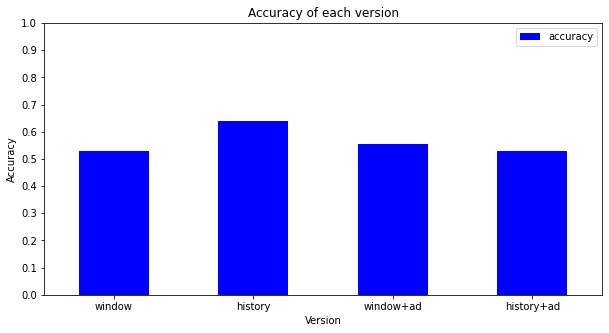

In [16]:
import matplotlib.pyplot as plt

df_accuracy.plot(kind='bar', x='version_name', y='accuracy', title='Accuracy of each version', xlabel='Version', ylabel='Accuracy', color='blue', figsize=(10, 5), rot=0)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

plt.show()

